In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. Data Aggregation and Preprocessing

In [2]:
# List of the 20 subreddit names 
subreddits = [
    'dataisbeautiful', 'datascience', 'MachineLearning', 'statistics', 'bigdata',
    'datasciencejobs', 'datasets', 'artificial', 'deeplearning', 'machinelearningjobs',
    'dataengineering', 'learnmachinelearning', 'learnprogramming', 'dataanalysis',
    'dataviz', 'learnpython', 'python', 'learnsql', 'learnjavascript', 'programming'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each subreddit, load its CSV file, add the subreddit column, and append to the list
for subreddit in subreddits:
    file_path = f"{subreddit}_20240415.csv"
    df = pd.read_csv(file_path)
    df['subreddit'] = subreddit  # Add a column indicating the subreddit
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.head())

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined.csv", index=False)


       id                                              title selftext   score  \
0  hs9mnz  [OC] Trending Google Searches by State Between...      NaN  162707   
1  i9ljw9  I analysed 70 years of baby names in the US to...      NaN  122729   
2  fxucds  For everyone asking why i didn't include the S...      NaN  120978   
3  b5f9wi  Let's hear it for the lurkers! The vast majori...      NaN  111353   
4  hni7zy  US College Tuition & Fees vs. Overall Inflatio...      NaN  109991   

   num_comments       author          created_utc  \
0          7649  V1Analytics  2020-07-16 13:27:25   
1          3893      nathcun  2020-08-14 13:03:03   
2          3120  harry29ford  2020-04-09 15:24:20   
3          4682    TrueBirch  2019-03-25 19:37:10   
4          5109       chartr  2020-07-08 14:40:07   

                                   url  gilded        subreddit  
0      https://v.redd.it/l0rvdugoy7b51      15  dataisbeautiful  
1  https://i.redd.it/eukx9llouyg51.png       3  dataisbeautifu

In [3]:
# load the combined csv file
df = pd.read_csv('combined.csv')

# print the shape of the dataframe
print(f"The combined dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

# count the number of posts in each subreddit
print(df['subreddit'].value_counts())

The combined dataframe has 19416 rows and 10 columns.
subreddit
statistics              1000
datasets                1000
artificial              1000
deeplearning            1000
dataanalysis            1000
dataengineering          999
bigdata                  999
learnsql                 999
learnpython              997
MachineLearning          996
learnjavascript          996
learnprogramming         995
dataisbeautiful          995
python                   992
learnmachinelearning     990
datascience              989
machinelearningjobs      982
programming              970
datasciencejobs          961
dataviz                  556
Name: count, dtype: int64


## Dataset Column Descriptions
These columns collectively provide comprehensive information about each post, allowing for detailed analysis of content trends, user engagement, and community interactions within Reddit.

1. **id**: Unique identifier for each post, used to distinguish each entry in the dataset.
2. **title**: The headline or primary title of the Reddit post, summarizing the content.
3. **selftext**: The main body text of the post, containing the detailed message or content.
4. **score**: Net upvotes of the post (upvotes minus downvotes), indicating the popularity or community approval.
5. **num_comments**: Number of comments made on the post, reflecting the level of discussion or interaction it generated.
6. **author**: Username of the individual who created the post, useful for identifying and tracking user activity.
7. **created_utc**: Timestamp of when the post was created, in UTC format, providing temporal context for the content.
8. **url**: URL associated with the post, which could be a link to an external site or the Reddit post itself.
9. **gilded**: Number of times the post has been awarded gold by other users, a mark of significant appreciation.
10. **subreddit**: The specific subreddit where the post was published, indicating the relevant community or topic area.



### Check missing values:

In [4]:
# see the number of nan values in each column
print(df.isna().sum())

id                  0
title               0
selftext        10306
score               0
num_comments        0
author           1135
created_utc         0
url                 0
gilded              0
subreddit           0
dtype: int64


After checking the missing values, we found that there are about half of the posts that do not have a valid "selftext", which may be due to the API limitations. However, since the title of each posts is relatively short and thus less informative, we still decided to keep the selftext and would use it for further sentiment score calculation.

In [5]:
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove user handles
        text = re.sub(r'@\w+', '', text)
        # Remove punctuation and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        # If the input is not a string, return an empty string
        text = ""
    return text

# Apply cleaning function to post titles
df['cleaned_title'] = df['title'].apply(clean_text)
# Apply cleaning function to selftext  
df['cleaned_selftext'] = df['selftext'].apply(clean_text)


In [6]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function
df['cleaned_title'] = df['cleaned_title'].apply(remove_stopwords)
# apply the remove_stopwords function to selftext
df['cleaned_selftext'] = df['cleaned_selftext'].apply(remove_stopwords)

# Display the head of the DataFrame to check cleaned titles and selftext
print(df[['title', 'cleaned_title','cleaned_selftext']].head())

                                               title  \
0  [OC] Trending Google Searches by State Between...   
1  I analysed 70 years of baby names in the US to...   
2  For everyone asking why i didn't include the S...   
3  Let's hear it for the lurkers! The vast majori...   
4  US College Tuition & Fees vs. Overall Inflatio...   

                                       cleaned_title cleaned_selftext  
0                  oc trending google searches state                   
1  analysed years baby names us decide call male ...                   
2  everyone asking didnt include spanish flu plag...                   
3  lets hear lurkers vast majority reddit users d...                   
4    us college tuition fees vs overall inflation oc                   


## 2. Sentiment Analysis:

We calculated the sentiment scores of each post using VADER (Valence Aware Dictionary and sEntiment Reasoner). VADER is specifically tuned to sentiments expressed in social media and provides a compound score that summarizes the overall sentiment of a given text. 

Interpreting the Compound Score:<br>
[-1.0 to -0.5]: Strongly negative<br>
[-0.5 to -0.1]: Somewhat negative<br>
[-0.1 to 0.1]: Neutral / no emotional content<br>
[0.1 to 0.5]: Somewhat positive<br>
[0.5 to 1.0]: Strongly positive

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(title, selftext):
    if pd.isna(selftext):
        text = title
    else:
        text = title + ' ' + selftext
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

# Apply the function to get sentiment scores
df['sentiment'] = df.apply(lambda x: get_sentiment(x['cleaned_title'], x['cleaned_selftext']), axis=1)

# Display sentiment scores
print(df[['cleaned_title', 'cleaned_selftext', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zhiduokatara/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                       cleaned_title cleaned_selftext  \
0                  oc trending google searches state                    
1  analysed years baby names us decide call male ...                    
2  everyone asking didnt include spanish flu plag...                    
3  lets hear lurkers vast majority reddit users d...                    
4    us college tuition fees vs overall inflation oc                    

   sentiment  
0     0.0000  
1     0.0000  
2     0.2924  
3     0.0000  
4     0.0000  


score_category
Strongly positive    7904
Neutral              6439
Somewhat positive    3027
Somewhat negative    1206
Strongly negative     840
Name: count, dtype: int64


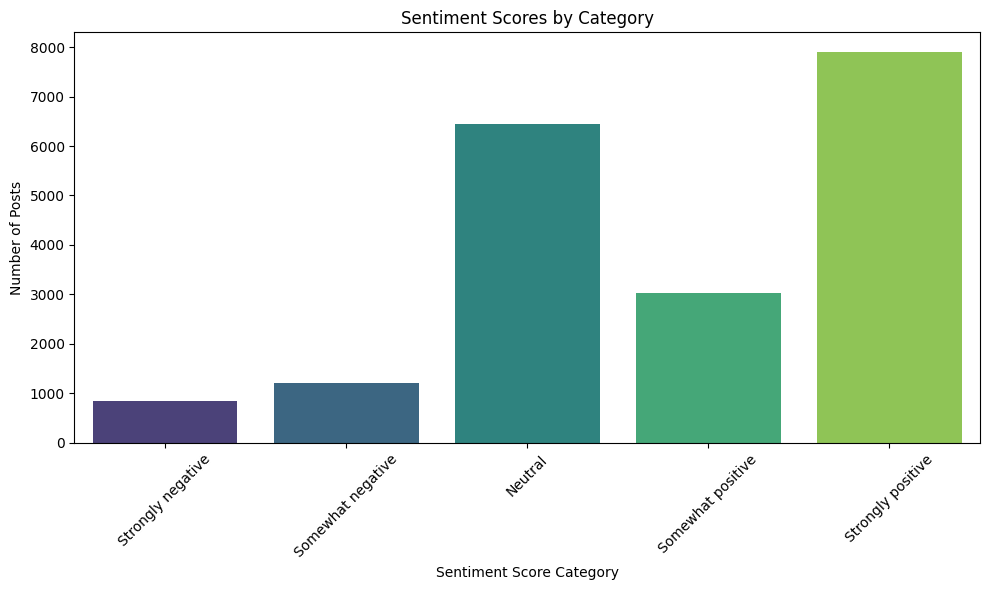

In [8]:
bins = [-1.0, -0.5, -0.1, 0.1, 0.5, 1.0]
labels = ['Strongly negative', 'Somewhat negative', 'Neutral', 'Somewhat positive', 'Strongly positive']
df['score_category'] = pd.cut(df['sentiment'], bins=bins, labels=labels)
print(df['score_category'].value_counts())

# visualize the sentiment scores by category:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score_category', palette='viridis')
plt.title('Sentiment Scores by Category')
plt.xlabel('Sentiment Score Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sentiment Analysis Across 20 Data-Related Subreddits:

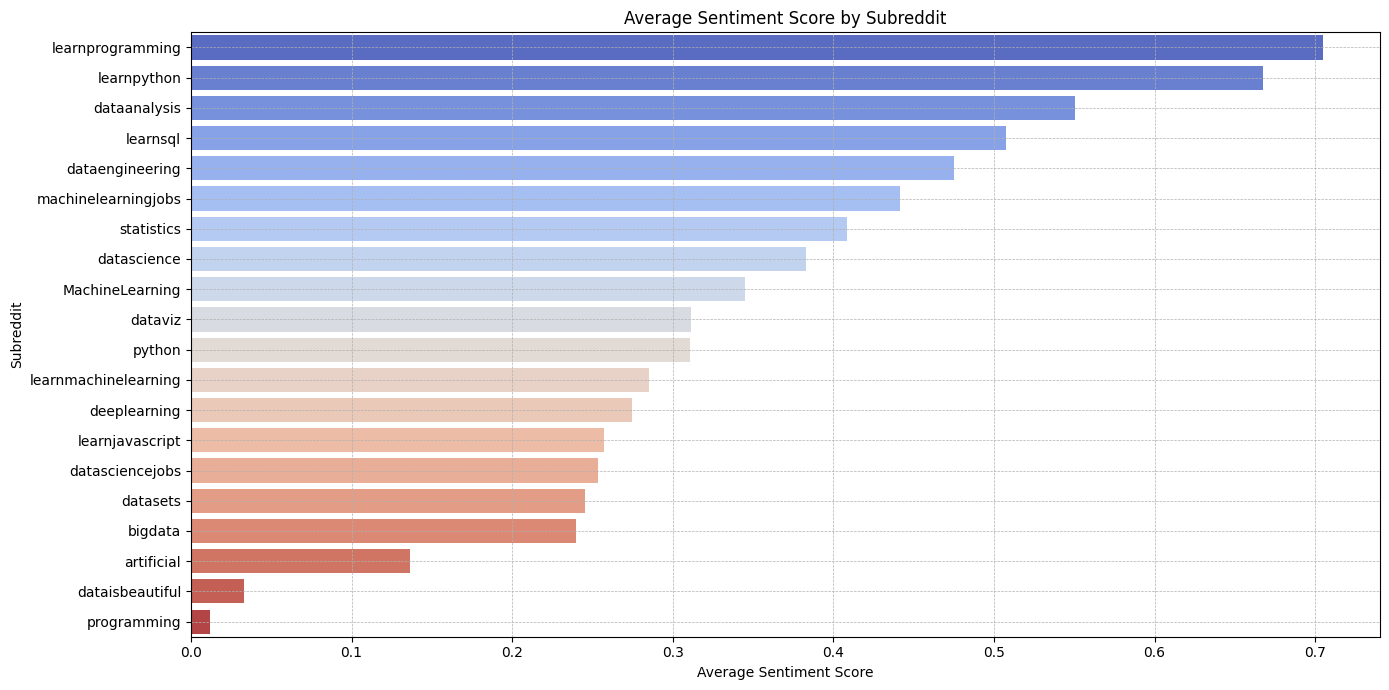

In [9]:
# Step 1: Calculate Average Sentiment by Subreddit
average_sentiment_by_subreddit = df.groupby('subreddit')['sentiment'].mean().reset_index()

# Step 2: Visualization
plt.figure(figsize=(14, 7))
sns.barplot(x='sentiment', y='subreddit', data=average_sentiment_by_subreddit.sort_values(by='sentiment', ascending=False),
            palette='coolwarm')
plt.title('Average Sentiment Score by Subreddit')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Subreddit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
#show the average sentiment by subreddit in descending order
print(average_sentiment_by_subreddit.sort_values(by='sentiment', ascending=False))

               subreddit  sentiment
13      learnprogramming   0.705134
14           learnpython   0.667809
3           dataanalysis   0.550778
15              learnsql   0.507659
4        dataengineering   0.475259
16   machinelearningjobs   0.441286
19            statistics   0.408624
6            datascience   0.382705
0        MachineLearning   0.345166
9                dataviz   0.311154
18                python   0.310514
12  learnmachinelearning   0.285467
10          deeplearning   0.274573
11       learnjavascript   0.257120
7        datasciencejobs   0.253645
8               datasets   0.245223
2                bigdata   0.239544
1             artificial   0.136545
5        dataisbeautiful   0.033076
17           programming   0.011681


#### Our Key Findings
The sentiment analysis across different data-related subreddits reveals the general emotional tone and atmosphere within these communities, influenced by the nature of content and user interactions.

- **Highly Positive Sentiment**: 
  - **learnprogramming (0.705)** demonstrates the highest average sentiment score, indicative of a highly positive engagement likely driven by educational content and supportive interactions.
  - **learnpython (0.668)** and **dataanalysis (0.551)** also exhibit strong positive sentiments, reflecting the encouraging and constructive nature of these learning-focused communities.

- **Moderate Positive Sentiment**: 
  - **learnsql (0.508)** and **dataengineering (0.475)**: These scores suggest constructive discussions typically centered around technical learning and professional development.

- **Lower Positive Sentiment**:
  - **machinelearningjobs (0.441)** and **statistics (0.409)**: Lower positive sentiments in these forums could be due to the technical and often challenging nature of discussions that don’t always yield straightforward positive outcomes.
  - **datascience (0.383)**: The critical nature of discussions and the complexity of topics in this community contribute to its moderate sentiment score.

- **Lowest Sentiment**:
  - **programming (0.012)**: Exhibits the lowest sentiment score, reflecting the frustrations and challenges inherent in programming tasks and debug sessions.
  - **dataisbeautiful (0.033)** and **artificial (0.137)**: These subreddits show lower sentiment scores, possibly indicating more critical or diverse opinions that lead to mixed emotional expressions.

#### Interpretation
- **Educational and Learner-Focused**: Subreddits centered around learning programming languages and data analysis tend to foster more positive sentiments. This trend underscores the supportive and constructive interactions within these communities.
- **Technical Challenges and Professional Discussions**: Forums like **programming** and **machinelearningjobs** often involve in-depth technical discussions that can be challenging and, at times, frustrating, which might lower the sentiment scores.

#### Conclusion
This sentiment analysis underscores how the thematic focus of a subreddit—be it educational, technical, or professional—significantly influences the emotional tone of the discussions. Subreddits dedicated to educational content generally cultivate a positive atmosphere, supporting users in their learning journeys. In contrast, forums that engage with more complex and technically challenging topics may experience more varied sentiment dynamics, reflecting the nature of the content and the potential difficulties encountered by participants.


In [11]:
df.head()

,id,title,selftext,score,num_comments,author,created_utc,url,gilded,subreddit,cleaned_title,cleaned_selftext,sentiment,score_category
0,hs9mnz,[OC] Trending Google Searches by State Between...,NaN,162707,7649,V1Analytics,2020-07-16 13:27:25,https://v.redd.it/l0rvdugoy7b51,15,dataisbeautiful,oc trending google searches state,,0.0000,Neutral
1,i9ljw9,I analysed 70 years of baby names in the US to...,NaN,122729,3893,nathcun,2020-08-14 13:03:03,https://i.redd.it/eukx9llouyg51.png,3,dataisbeautiful,analysed years baby names us decide call male ...,,0.0000,Neutral
2,fxucds,For everyone asking why i didn't include the S...,NaN,120978,3120,harry29ford,2020-04-09 15:24:20,https://v.redd.it/nttldl0c8tr41,3,dataisbeautiful,everyone asking didnt include spanish flu plag...,,0.2924,Somewhat positive
3,b5f9wi,Let's hear it for the lurkers! The vast majori...,NaN,111353,4682,TrueBirch,2019-03-25 19:37:10,https://i.redd.it/2731jdr3ibo21.png,1,dataisbeautiful,lets hear lurkers vast majority reddit users d...,,0.0000,Neutral
4,hni7zy,US College Tuition & Fees vs. Overall Inflatio...,NaN,109991,5109,chartr,2020-07-08 14:40:07,https://i.redd.it/xcdto6rnan951.jpg,0,dataisbeautiful,us college tuition fees vs overall inflation oc,,0.0000,Neutral


In [12]:
# count the number of nan values in the selftext column
print(df['cleaned_selftext'].isnull().sum())

0


## 3. Analysis of Engagement Metrics by Sentiment Category: 
Correlation analysis between sentiment scores and engagement metrics

Average engagement metrics by sentiment category:
      score_category  num_comments        score
0  Strongly negative    338.233333  4176.277381
1  Somewhat negative    243.344942  3425.689055
2            Neutral    240.854636  4531.180152
3  Somewhat positive    190.550050  2941.459201
4  Strongly positive     82.707237   764.203821
Correlation matrix:
                num_comments     score  sentiment_code
num_comments        1.000000  0.889196       -0.957574
score               0.889196  1.000000       -0.780369
sentiment_code     -0.957574 -0.780369        1.000000


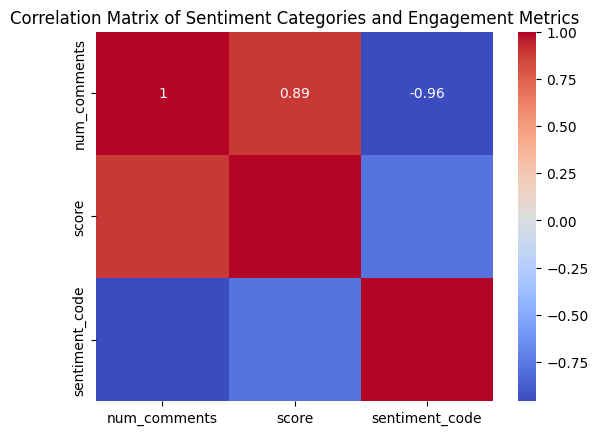

In [13]:

# Step 1: Aggregate Engagement Metrics by Sentiment Category
engagement_by_sentiment = df.groupby('score_category').agg({
    'num_comments': 'mean',  # Average number of comments per sentiment category
    'score': 'mean'          # Average score (upvotes minus downvotes) per sentiment category
}).reset_index()

print("Average engagement metrics by sentiment category:")
print(engagement_by_sentiment)

# Step 2: Correlation Analysis
# For demonstration, convert sentiment categories to numeric codes to calculate correlation
engagement_by_sentiment['sentiment_code'] = engagement_by_sentiment['score_category'].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = engagement_by_sentiment[['num_comments', 'score', 'sentiment_code']].corr()

print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sentiment Categories and Engagement Metrics')
plt.show()


#### Our Key Findings:

- **Engagement by Sentiment Category**:
  - **Strongly Negative**: Posts classified as strongly negative show relatively high levels of engagement with an average of **338.23 comments** and a **score of 4176.28**.
  - **Somewhat Negative**: These posts also demonstrate significant engagement, with an average of **243.34 comments** and a **score of 3425.69**.
  - **Neutral**: Posts with neutral sentiment receive an average of **240.85 comments** and a **score of 4531.18**, which is surprisingly high, indicating a broad interest or controversy.
  - **Somewhat Positive**: These posts see slightly fewer interactions, with **190.55 comments** and a **score of 2941.46**.
  - **Strongly Positive**: Strongly positive posts attract the least interaction, averaging **82.71 comments** and a **score of 764.20**.

#### Correlation Analysis:
- A **high positive correlation (0.889)** between `num_comments` and `score` suggests that posts with higher scores tend to have more comments. This strong link indicates that engagement in terms of score is a robust predictor of comment activity.
- **Negative correlations (-0.958 for comments and -0.780 for scores)** with `sentiment_code` indicate that more negatively perceived posts garner significantly more engagement. This pattern suggests that negative content tends to provoke more user reactions.

#### Interpretation:
- **Impact of Negative Sentiment**: The data highlight a trend where negative sentiments are major drivers of engagement. This could be due to the provocative nature of such content, which may incite more reactions from the community.
- **Neutral and Positive Posts**: While neutral posts receive moderate to high engagement, possibly due to their balanced or less polarizing content, the interaction drops significantly with strongly positive content, posing a challenge in fostering interactions on overtly positive posts.
- **Engagement Dynamics**: The correlation between engagement metrics confirms that popular posts (those with higher scores) also tend to receive more comments, reinforcing the visibility-engagement cycle.

#### Conclusion:
These insights have implications for content strategies on platforms like Reddit, where understanding user engagement dynamics can aid in crafting content that aligns with desired interactions. For community managers and content creators, this knowledge is valuable for promoting and managing discussions in line with subreddit goals or broader community engagement strategies. Moderators and strategists can use these findings to tailor their approaches, particularly by acknowledging the significant engagement generated by content with negative sentiments and by exploring ways to enhance interactions on positive posts.


## 4. Topic Modeling: using LDA model

In [14]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('stopwords')
nltk.download('punkt')

# lda_display = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')  # 'mmds' or 'tsne' might work better for single-threaded operations
# pyLDAvis.display(lda_display)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhiduokatara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhiduokatara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# Step 1: Prepare the data
# Tokenize the data
texts = df['cleaned_title'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
texts = texts.apply(lambda x: [word for word in x if word not in stop_words])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)
# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 2: Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=100)

# Step 3: Analyze the Topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Step 4: Visualization using pyLDAvis
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

(0, '0.035*"using" + 0.035*"made" + 0.032*"python" + 0.020*"game" + 0.019*"app"')
(1, '0.224*"data" + 0.035*"science" + 0.028*"analyst" + 0.024*"hiring" + 0.020*"scientist"')
(2, '0.052*"web" + 0.032*"vs" + 0.030*"youtube" + 0.019*"books" + 0.018*"linux"')
(3, '0.025*"use" + 0.024*"open" + 0.024*"ai" + 0.017*"like" + 0.017*"source"')
(4, '0.021*"need" + 0.021*"know" + 0.019*"years" + 0.016*"big" + 0.015*"way"')
(5, '0.035*"google" + 0.023*"build" + 0.021*"online" + 0.016*"computer" + 0.015*"developers"')
(6, '0.058*"python" + 0.045*"sql" + 0.037*"learn" + 0.034*"learning" + 0.033*"javascript"')
(7, '0.063*"first" + 0.043*"project" + 0.021*"oc" + 0.017*"stuff" + 0.015*"year"')
(8, '0.041*"programming" + 0.036*"code" + 0.021*"using" + 0.019*"python" + 0.017*"remote"')
(9, '0.075*"learning" + 0.061*"machine" + 0.042*"job" + 0.040*"engineer" + 0.032*"software"')


/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked

 ### Insights from Topic Distributions Across Data-Related Subreddits

1. **Development and Applications (Topics 0 & 5)**:
   - **Subreddits**: `programming`, `python`, `learnprogramming`
   - **Focus**: Application development and technological tool-building with an emphasis on Python and Google tools. These topics indicate a hands-on approach to learning and applying programming skills in practical projects.

2. **Career and Educational Pathways (Topics 1 & 6)**:
   - **Subreddits**: `datascience`, `MachineLearning`, `learnmachinelearning`
   - **Focus**: Career development, job opportunities in data science, and learning essential programming languages. These discussions are crucial for those looking to advance professionally in data science and machine learning.

3. **Resource Sharing and Educational Content (Topic 2)**:
   - **Subreddits**: `learnjavascript`, `learnpython`
   - **Focus**: Sharing of educational resources like books and online tutorials, especially YouTube videos. This topic highlights the community’s commitment to self-improvement and resource sharing.

4. **Open Source and Innovation (Topics 3 & 8)**:
   - **Subreddits**: `artificial`, `opensource`
   - **Focus**: Discussions around open-source projects, AI, and advanced programming techniques, reflecting a deep interest in leveraging open technologies for innovative solutions.

5. **General Advice and Community Interaction (Topics 4 & 7)**:
   - **Subreddits**: `learnprogramming`, `programming`
   - **Focus**: General advice, sharing of personal projects and first tech experiences. These topics underscore the community’s supportive nature and its role in fostering personal growth.

6. **Machine Learning and Professional Development (Topic 9)**:
   - **Subreddits**: `MachineLearning`, `dataengineering`
   - **Focus**: Professional roles and discussions on machine learning and software engineering. This topic is indicative of a highly specialized audience focused on the cutting edge of technology.

### Conclusion

The insights from LDA topic modeling highlight a community that is diverse in skill levels but unified in its pursuit of technological proficiency and professional development. The findings from these topics can help in tailoring content to better serve user interests and support community growth by aligning resources and discussions with the users' professional aspirations and educational needs.


## 5. Building Recommendation System 

In [16]:
# Calculate mean sentiment for each user
# count the number of unique authors
print(df['author'].nunique())
# show the number of posts by each author, that are more than 1
author_counts = df['author'].value_counts()
more_than_one_post = author_counts[author_counts >= 1]
print(more_than_one_post)

# print(df['author'].value_counts())


# user_sentiments = df.groupby('author')['sentiment'].mean().reset_index()
# user_sentiments 
# df.shape

11494
author
ai_jobs             747
cavedave            134
remoteimpactjobs    106
golangprojects       85
cmillionaire9        80
                   ... 
thedankzone           1
arcotime29            1
ytcoinartist          1
jamesj                1
b0red                 1
Name: count, Length: 11494, dtype: int64


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'df' is your loaded DataFrame with all relevant columns

# Fill NaN values with empty strings
df['title'] = df['title'].fillna('')
df['selftext'] = df['selftext'].fillna('')

# Concatenate 'title' and 'selftext' with a space in between
df['text'] = df['title'] + " " + df['selftext']

# Create a TF-IDF matrix of the combined text
tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf_vect.fit_transform(df['text'])

# Fit LDA to find topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Get the dominant topic for each post
topic_results = lda.transform(dtm)
df['dominant_topic'] = topic_results.argmax(axis=1)

### Building the user profile for recommendation system

In [23]:
df

,id,title,selftext,score,num_comments,author,created_utc,url,gilded,subreddit,cleaned_title,cleaned_selftext,sentiment,score_category,text,dominant_topic
0,hs9mnz,[OC] Trending Google Searches by State Between...,,162707,7649,V1Analytics,2020-07-16 13:27:25,https://v.redd.it/l0rvdugoy7b51,15,dataisbeautiful,oc trending google searches state,,0.0000,Neutral,[OC] Trending Google Searches by State Between...,6
1,i9ljw9,I analysed 70 years of baby names in the US to...,,122729,3893,nathcun,2020-08-14 13:03:03,https://i.redd.it/eukx9llouyg51.png,3,dataisbeautiful,analysed years baby names us decide call male ...,,0.0000,Neutral,I analysed 70 years of baby names in the US to...,1
2,fxucds,For everyone asking why i didn't include the S...,,120978,3120,harry29ford,2020-04-09 15:24:20,https://v.redd.it/nttldl0c8tr41,3,dataisbeautiful,everyone asking didnt include spanish flu plag...,,0.2924,Somewhat positive,For everyone asking why i didn't include the S...,4
3,b5f9wi,Let's hear it for the lurkers! The vast majori...,,111353,4682,TrueBirch,2019-03-25 19:37:10,https://i.redd.it/2731jdr3ibo21.png,1,dataisbeautiful,lets hear lurkers vast majority reddit users d...,,0.0000,Neutral,Let's hear it for the lurkers! The vast majori...,4
4,hni7zy,US College Tuition & Fees vs. Overall Inflatio...,,109991,5109,chartr,2020-07-08 14:40:07,https://i.redd.it/xcdto6rnan951.jpg,0,dataisbeautiful,us college tuition fees vs overall inflation oc,,0.0000,Neutral,US College Tuition & Fees vs. Overall Inflatio...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19411,43f5aq,Apollo 11 source code,,2196,366,jakesyl,2016-01-30 18:07:51,http://www.ibiblio.org/apollo/listings/Luminar...,0,programming,apollo source code,,0.0000,Neutral,Apollo 11 source code,0
19412,5a0qxf,How I Became HackerRank #1 In Two Hours,,2191,405,rampage102,2016-10-29 14:47:51,http://williampross.com/became-hackerrank-1-tw...,0,programming,became hackerrank two hours,,0.0000,Neutral,How I Became HackerRank #1 In Two Hours,4
19413,pivzeq,Hiring Developers: How to avoid the best,,2195,720,that_guy_iain,2021-09-06 09:18:42,https://www.getparthenon.com/blog/how-to-avoid...,0,programming,hiring developers avoid best,,0.4588,Somewhat positive,Hiring Developers: How to avoid the best,4
19414,4h5ul3,Do Experienced Programmers Use Google Frequent...,,2196,765,b0red,2016-04-30 19:35:38,http://codeahoy.com/2016/04/30/do-experienced-...,0,programming,experienced programmers use google frequently ...,,0.0000,Neutral,Do Experienced Programmers Use Google Frequent...,4


In [24]:
# Count the number of posts made by each user in each subreddit
user_subreddit_posts = df.groupby(['author', 'subreddit'])['id'].count().reset_index()
user_subreddit_posts.columns = ['author', 'subreddit', 'num_posts']

# Find the most posted subreddit for each user
user_most_posted_subreddit = user_subreddit_posts.loc[user_subreddit_posts.groupby('author')['num_posts'].idxmax()]
user_most_posted_subreddit = user_most_posted_subreddit[['author', 'subreddit']]
user_most_posted_subreddit.columns = ['author', 'most_posted_subreddit']

# Create a basic user profile
user_profiles = user_most_posted_subreddit

# Associate users with topics based on their posts
user_topics = df.groupby('author')['dominant_topic'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

# Merge dominant topic into user profiles
user_profiles = pd.merge(user_profiles, user_topics, on='author')
# user_profiles
# Calculate the average sentiment score for each user
user_sentiments = df.groupby('author')['sentiment'].mean().reset_index()
user_sentiments.columns = ['author', 'average_sentiment']

# Merge the average sentiment score into the user profiles
user_profiles = pd.merge(user_profiles, user_sentiments, on='author', how='left')

# Display the updated user profiles
print(user_profiles.head())


               author most_posted_subreddit  dominant_topic  average_sentiment
0  --CreativeUsername                python               9           0.000000
1       --Explosion--       learnjavascript               0           0.000000
2         -Alchem1st-            artificial               0           0.796400
3     -BlackSquirrel-       MachineLearning               0           0.255300
4            -Montse-          dataanalysis               8           0.450325


In [25]:
def recommend_posts(user_id, num_recommendations=5):
    # Check if the user exists in the user_profiles DataFrame
    if user_id not in user_profiles['author'].values:
        print(f"User '{user_id}' not found in the dataset.")
        return None

    # Get user preferences
    user_pref = user_profiles[user_profiles['author'] == user_id]
    preferred_topic = user_pref['dominant_topic'].iloc[0]
    preferred_subreddit = user_pref['most_posted_subreddit'].iloc[0]

    # Filter posts based on user preferences
    recommendations = df[(df['dominant_topic'] == preferred_topic) &
                          (df['subreddit'] == preferred_subreddit)]

    # Sort posts by score and return top results
    recommendations = recommendations.sort_values(by='score', ascending=False)
    return recommendations.head(num_recommendations)

In [28]:
def recommend_posts(user_id, num_recommendations=5):
    # Check if the user exists in the user_profiles DataFrame
    if user_id not in user_profiles['author'].values:
        print(f"User '{user_id}' not found in the dataset.")
        return None

    # Get user preferences
    user_pref = user_profiles[user_profiles['author'] == user_id]
    preferred_topic = user_pref['dominant_topic'].iloc[0]
    preferred_subreddit = user_pref['most_posted_subreddit'].iloc[0]
    preferred_sentiment = user_pref['average_sentiment'].iloc[0]  # Assuming this column exists

    # Define a sentiment range for filtering
    sentiment_tolerance = 0.1  # Define a tolerance level for sentiment
    lower_bound = preferred_sentiment - sentiment_tolerance
    upper_bound = preferred_sentiment + sentiment_tolerance

    # Filter posts based on user preferences including sentiment
    recommendations = df[(df['dominant_topic'] == preferred_topic) &
                          (df['subreddit'] == preferred_subreddit) &
                          (df['sentiment'].between(lower_bound, upper_bound))]

    # Sort posts by score and return top results
    recommendations = recommendations.sort_values(by='score', ascending=False)
    return recommendations.head(num_recommendations)


In [29]:
# Example: Recommend posts for a specific user
recommendations = recommend_posts('zvone187')

if recommendations is not None:
    print(recommendations)

            id                                              title selftext  \
18446  144sn8r  Apollo dev posts backend code to Git to dispro...            
18451   3ke7ug  Eye tracking software for sufferers of ALS/MND...            
18458   6xh3xp       Reddit's main code is no longer open-source.            
18463  141oyj9  r/programming should shut down from 12th to 14...            
18471   6j8fdi  Mozilla is offering $2 million of you can arch...            

       score  num_comments             author          created_utc  \
18446  44910          2415       GhostalMedia  2023-06-09 02:24:09   
18451  19731           492  YeahIWroteOptiKey  2015-09-10 13:04:49   
18458  15281           854           interiot  2017-09-01 20:09:07   
18463  13369           547  Tintin_Quarentino  2023-06-05 19:28:19   
18471  10458           851          donrhummy  2017-06-24 14:29:56   

                                                     url  gilded    subreddit  \
18446   https://github.com/ch

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume tfidf_matrix is the TF-IDF matrix for the text data already computed
tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vect.fit_transform(df['text'])

def recommend_by_similarity(user_id, num_recommendations=5):
    if user_id not in user_profiles['author'].values:
        print(f"User '{user_id}' not found in the dataset.")
        return None

    user_pref = user_profiles[user_profiles['author'] == user_id]
    preferred_subreddit = user_pref['most_posted_subreddit'].iloc[0]

    # Filter posts by preferred subreddit to limit comparison set
    subreddit_posts = df[df['subreddit'] == preferred_subreddit]
    subreddit_indices = subreddit_posts.index

     # Calculate similarity with user's preferred posts (example: using the average of vectors)
    user_vector = tfidf_matrix[user_profiles.index[user_profiles['author'] == user_id]].mean(axis=0)
    user_vector = np.asarray(user_vector)  # Convert numpy matrix to numpy array
    similarities = cosine_similarity(user_vector, tfidf_matrix[subreddit_indices]).flatten()

    # Get top N recommendations
    top_indices = similarities.argsort()[-num_recommendations:][::-1]
    return df.iloc[top_indices]

# Example call
recommendations = recommend_by_similarity('zvone187', 5)
print(recommendations)


          id                                              title selftext  \
256   r4upsc  [OC] My GF and I tracked the effect of 10 diff...            
598  10ozhv7  [OC] One-in-five teens are almost constantly o...            
11    i2vx78  The environmental impact of Beyond Meat and a ...            
758   f7is48  A cube of CO₂ concentration from the Industria...            
133   6v8a9m                                [OC] "My eyes hurt"            

      score  num_comments           author          created_utc  \
256   47818          2255      HeroJournal  2021-11-29 12:24:03   
598   33560          2239          plotset  2023-01-30 11:16:21   
11   100528          8400  blackphantom773  2020-08-03 12:11:43   
758   30493          1275         kevpluck  2020-02-21 22:19:25   
133   57540          1063        superpaow  2017-08-22 03:06:35   

                                     url  gilded        subreddit  \
256  https://i.redd.it/01fjxs052j281.png       1  dataisbeautiful   
59